#Mounting the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# EEG Eye State Classification

## Problem
We want to predict whether a subject's eyes are open or closed from EEG signals.
This is a binary classification problem where ML can learn patterns in the EEG channels.


## Setup

In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report


## Load data

In [3]:
df = pd.read_csv('/content/drive/MyDrive/MLZoomcampCapstone2-main/EEG-Eye-State.csv')
df.head()

,AF3,AF4,F3,F4,F7,F8,FC5,FC6,T7,T8,P7,P8,O1,O2,eyeDetection
0,4329.23,4393.85,4289.23,4280.51,4009.23,4635.90,4148.21,4211.28,4350.26,4238.46,4586.15,4222.05,4096.92,4641.03,0
1,4324.62,4384.10,4293.85,4279.49,4004.62,4632.82,4148.72,4207.69,4342.05,4226.67,4586.67,4210.77,4097.44,4638.97,0
2,4327.69,4389.23,4295.38,4282.05,4006.67,4628.72,4156.41,4206.67,4336.92,4222.05,4583.59,4207.69,4096.92,4630.26,0
3,4328.72,4396.41,4296.41,4287.69,4011.79,4632.31,4155.90,4210.77,4343.59,4235.38,4582.56,4217.44,4097.44,4630.77,0
4,4326.15,4398.46,4292.31,4288.21,4011.79,4632.82,4151.28,4212.82,4347.69,4244.10,4586.67,4210.77,4095.90,4627.69,0



## Explorarity Data Analysis to understand the dataset

# Column details

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14980 entries, 0 to 14979
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AF3           14980 non-null  float64
 1   AF4           14980 non-null  float64
 2   F3            14980 non-null  float64
 3   F4            14980 non-null  float64
 4   F7            14980 non-null  float64
 5   F8            14980 non-null  float64
 6   FC5           14980 non-null  float64
 7   FC6           14980 non-null  float64
 8   T7            14980 non-null  float64
 9   T8            14980 non-null  float64
 10  P7            14980 non-null  float64
 11  P8            14980 non-null  float64
 12  O1            14980 non-null  float64
 13  O2            14980 non-null  float64
 14  eyeDetection  14980 non-null  int64  
dtypes: float64(14), int64(1)
memory usage: 1.7 MB


# Statistics of each column

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AF3,14980.0,4321.917777,2492.072174,1030.7700,4280.51,4294.36,4311.79,309231.00
AF4,14980.0,4416.435832,5891.285043,1366.1500,4342.05,4354.87,4372.82,715897.00
F3,14980.0,4264.022433,44.428052,1040.0000,4250.26,4262.56,4270.77,6880.51
F4,14980.0,4279.232774,41.544312,2257.9500,4267.69,4276.92,4287.18,7002.56
F7,14980.0,4009.767694,45.941672,2830.7700,3990.77,4005.64,4023.08,7804.62
F8,14980.0,4615.205336,1208.369958,86.6667,4590.77,4603.08,4617.44,152308.00
FC5,14980.0,4164.946326,5216.404632,2453.3300,4108.21,4120.51,4132.31,642564.00
FC6,14980.0,4202.456900,37.785981,3273.3300,4190.26,4200.51,4211.28,6823.08
T7,14980.0,4341.741075,34.738821,2089.7400,4331.79,4338.97,4347.18,6474.36
T8,14980.0,4231.316200,38.050903,1816.4100,4220.51,4229.23,4239.49,6674.36


In [6]:
df['eyeDetection'].value_counts(normalize=True)

,proportion
eyeDetection,
0,0.551202
1,0.448798


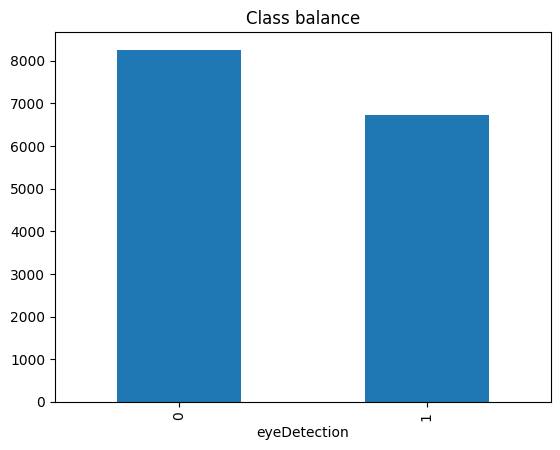

In [7]:
_ = df['eyeDetection'].value_counts().plot(kind='bar', title='Class balance')
plt.show()

## Identify Outliers with Box Plots



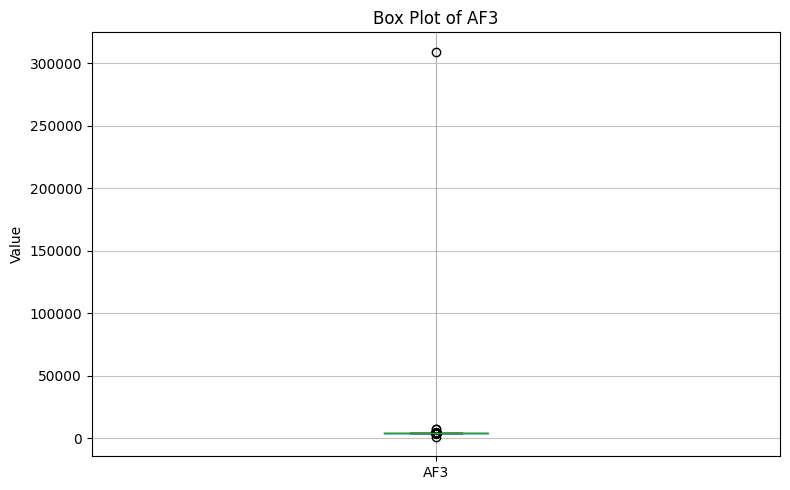

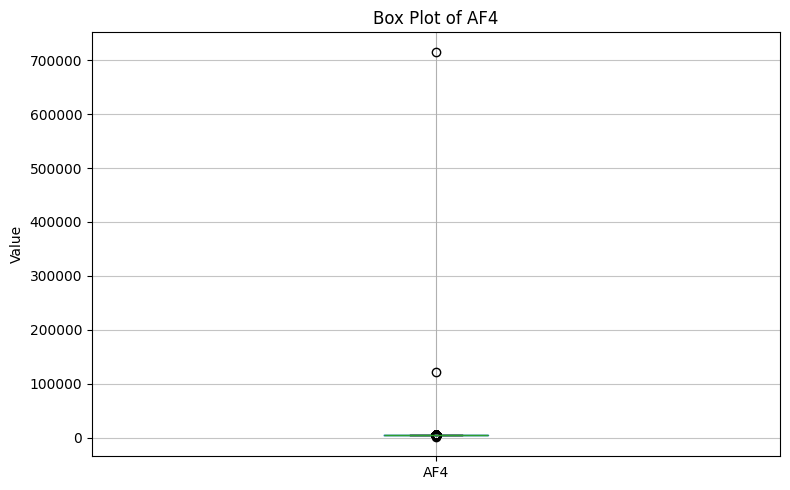

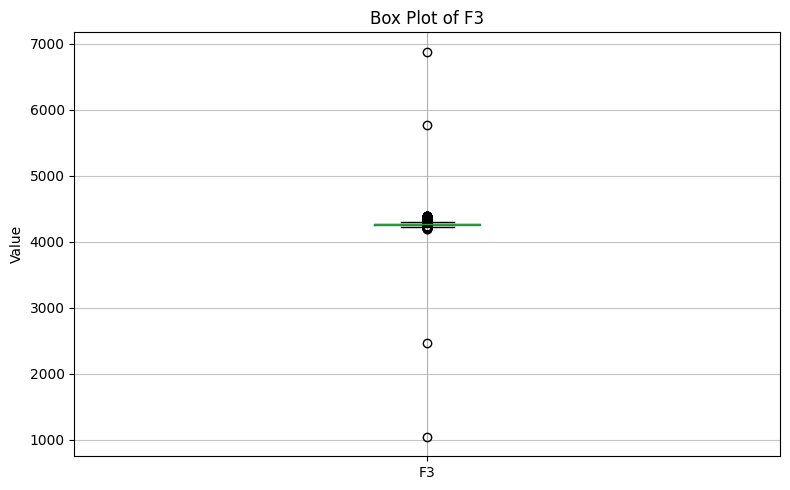

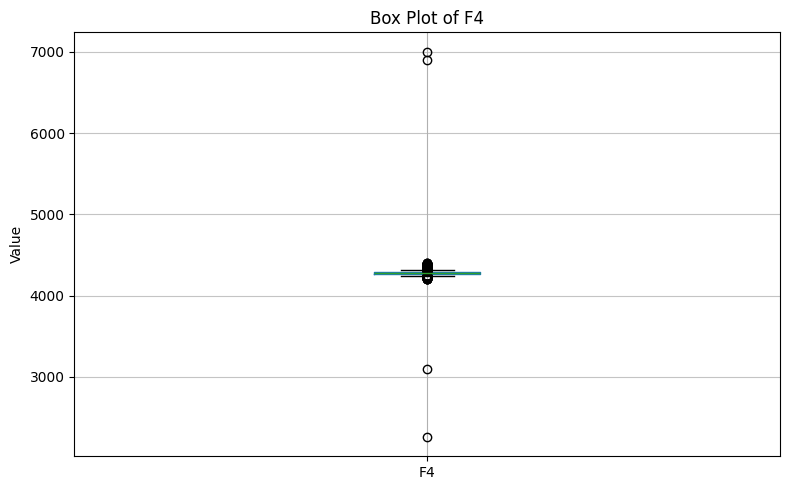

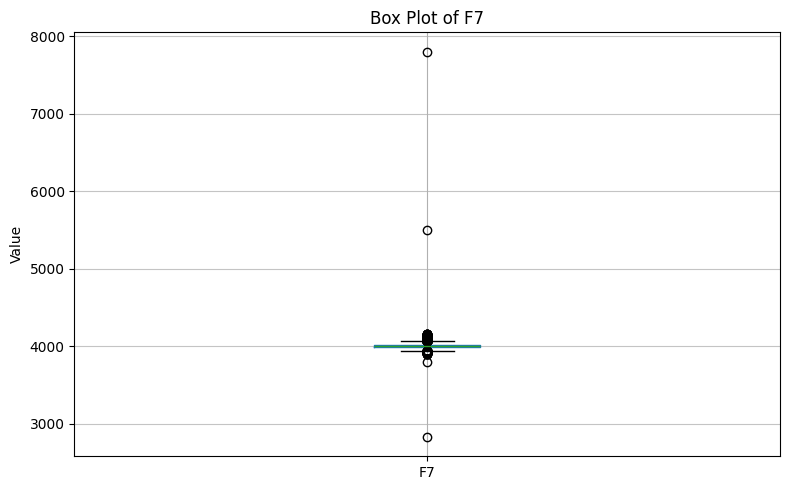

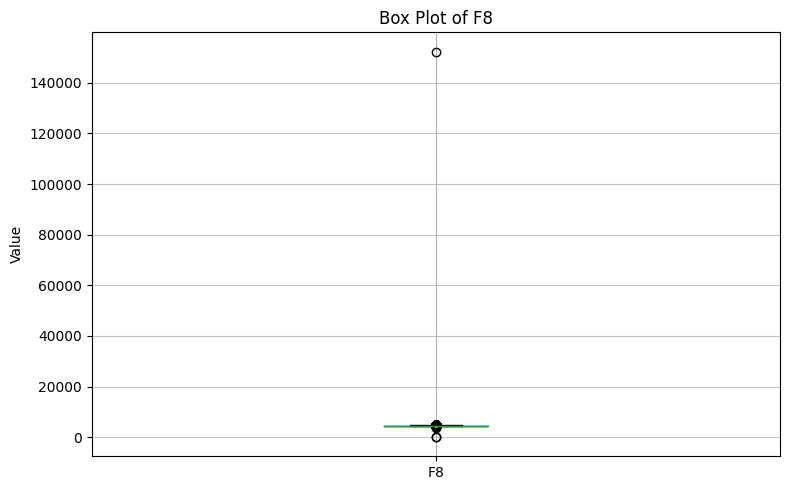

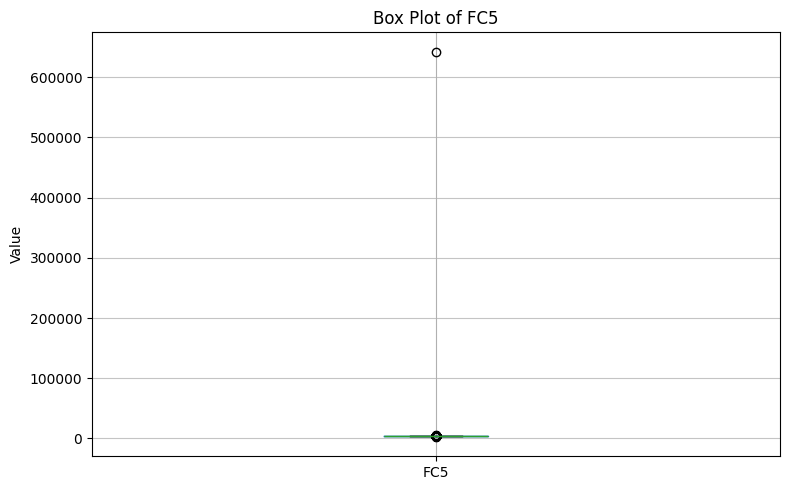

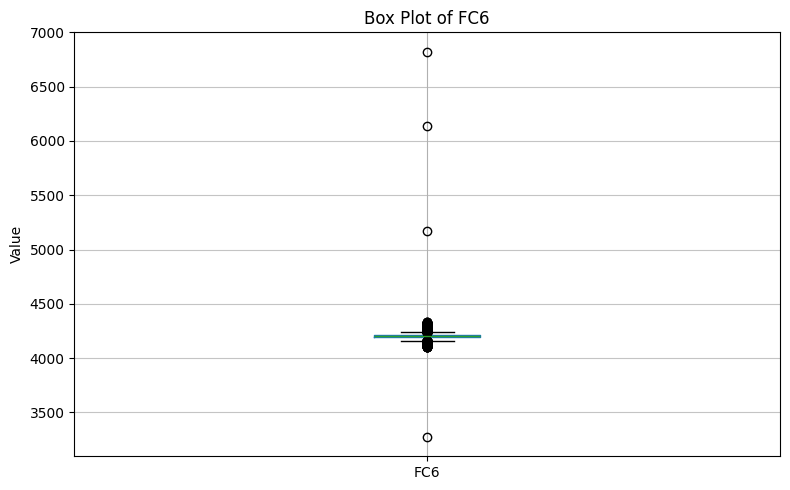

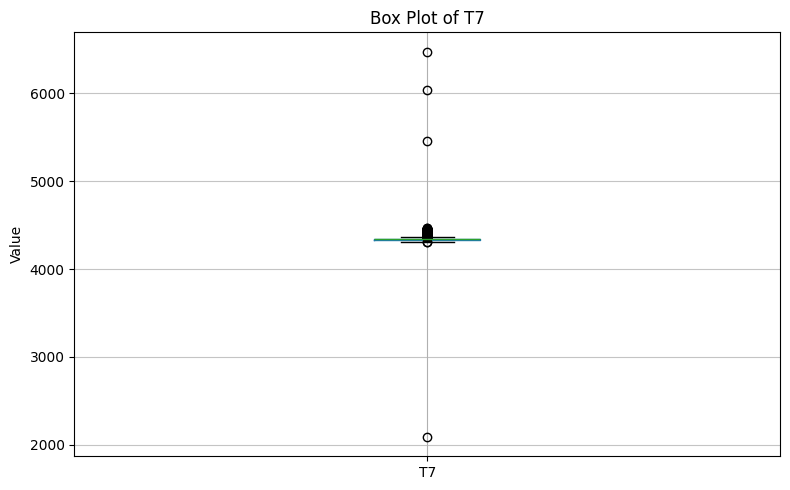

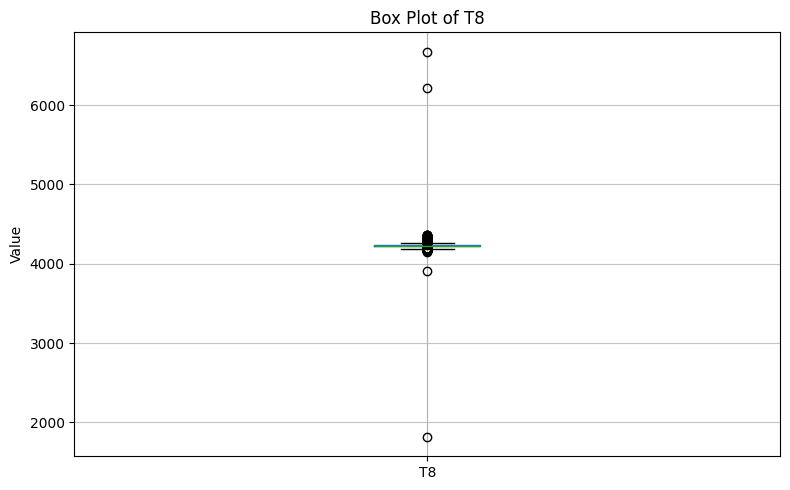

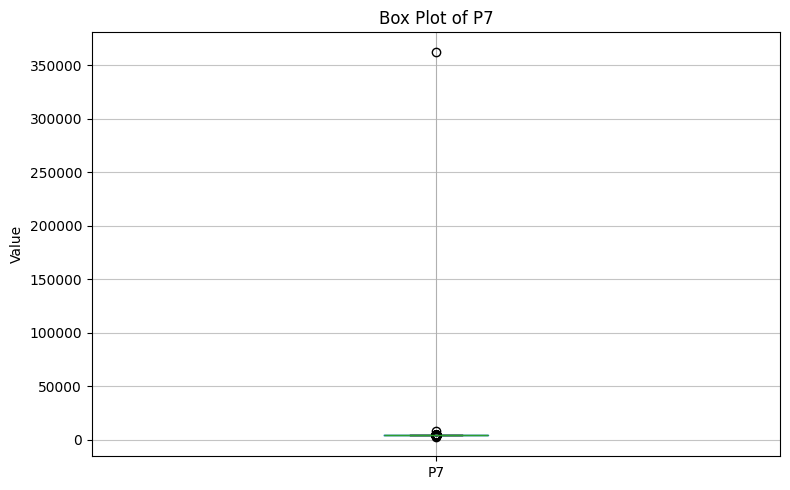

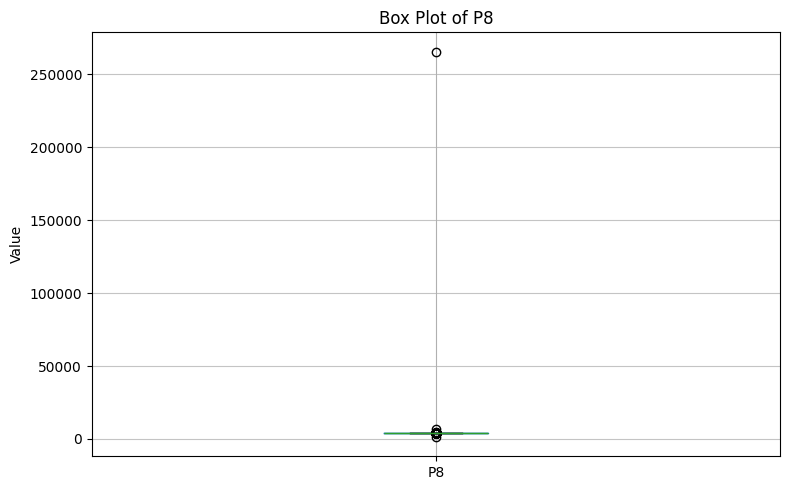

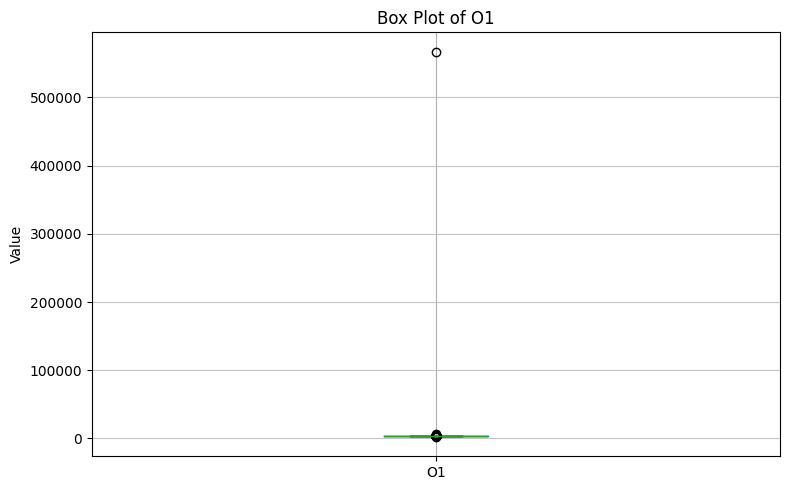

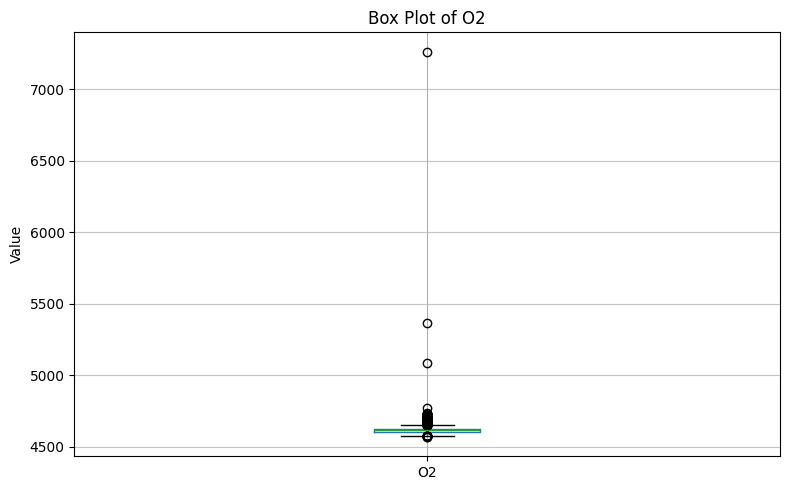

In [8]:
numerical_cols = df.columns.drop('eyeDetection')

for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    df.boxplot(column=col)
    plt.title(f'Box Plot of {col}')
    plt.ylabel('Value')
    plt.grid(axis='y', alpha=0.75)
    plt.tight_layout()
    plt.show()

# Correlation Matrix Heatmap

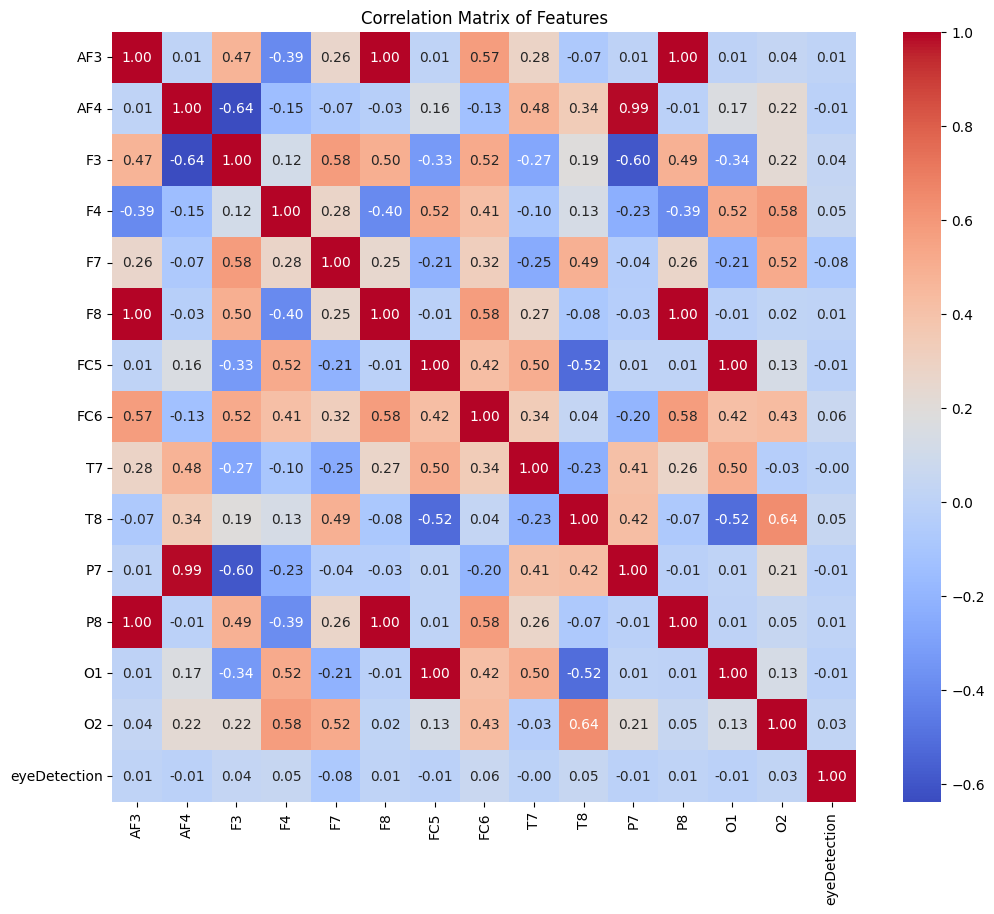

In [9]:
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

## Verify Missing Values


Checking for any missing values across all columns of the DataFrame to ensure data completeness.


In [10]:
df.isnull().sum()

,0
AF3,0
AF4,0
F3,0
F4,0
F7,0
F8,0
FC5,0
FC6,0
T7,0
T8,0


## Visualize Feature Distributions

The following code generates histograms for each numerical feature to visualize the distributions. This step identifies skewness or multi-modality, providing insight into the data's spread and central tendency.


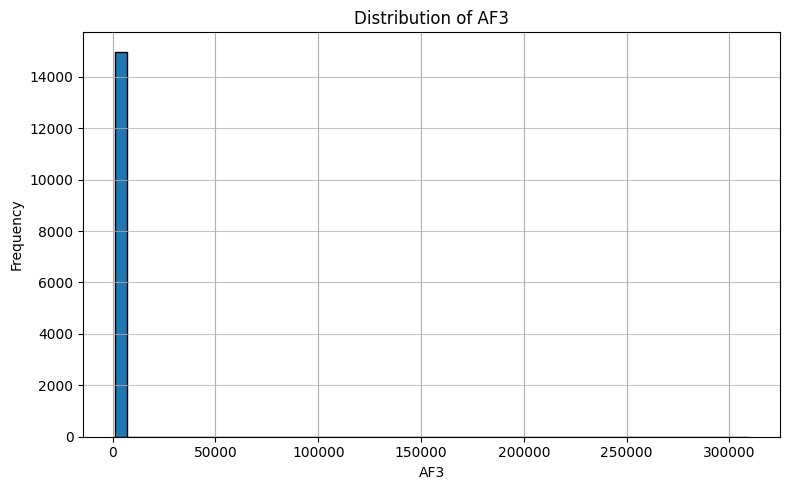

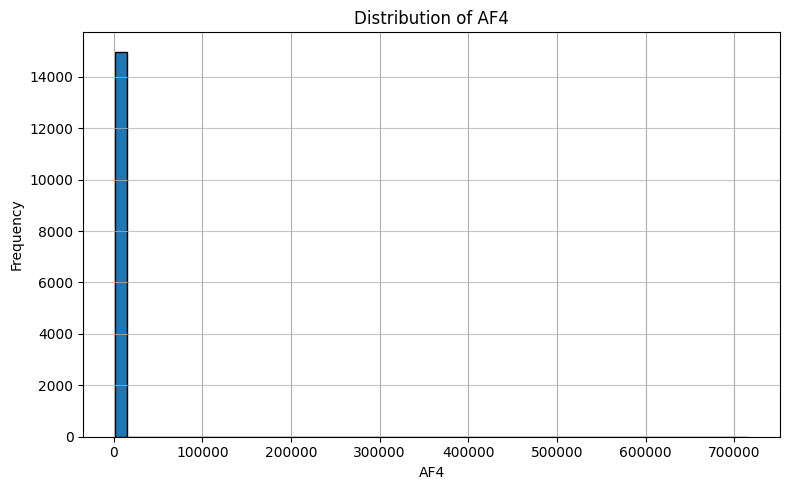

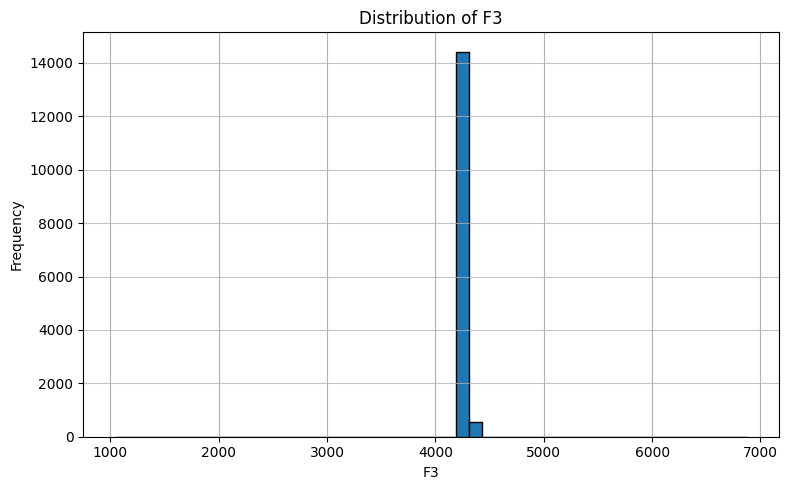

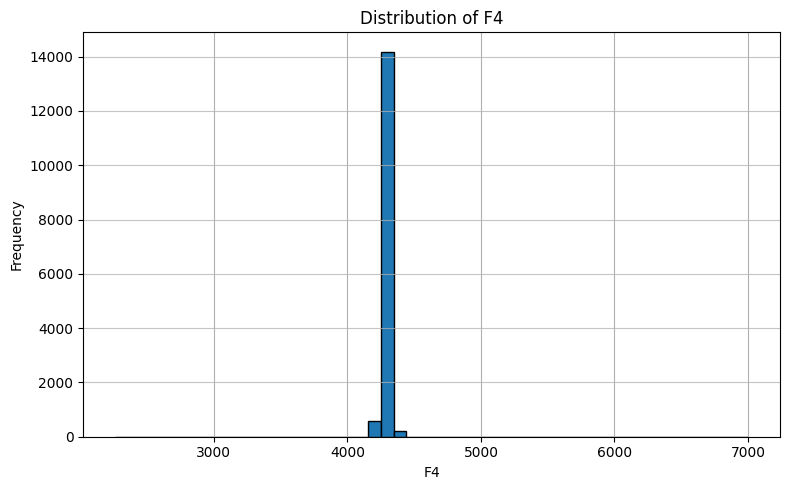

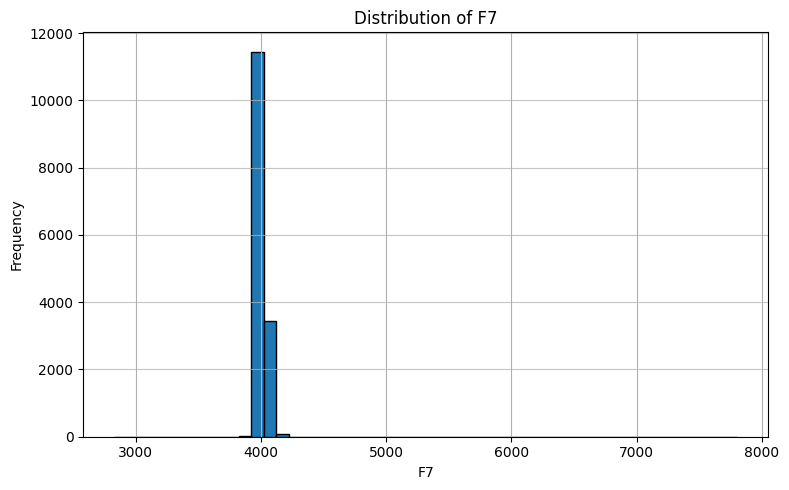

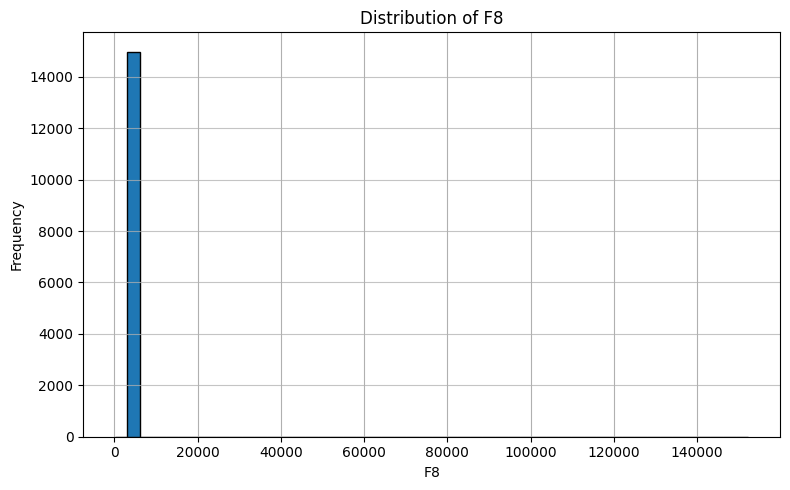

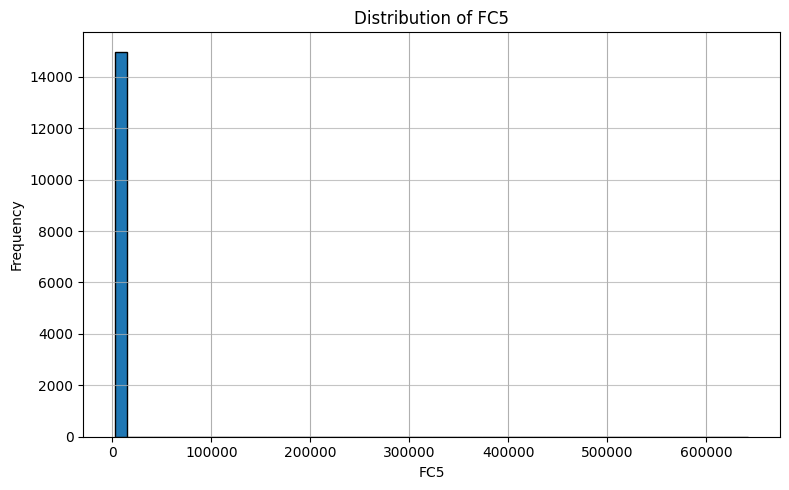

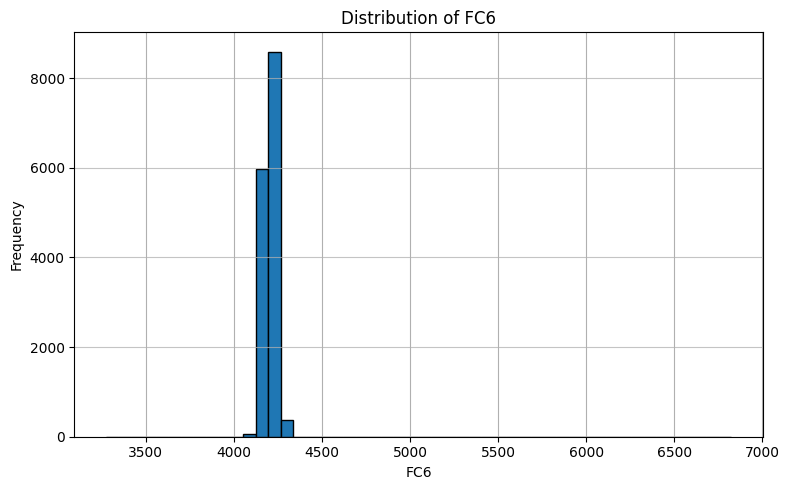

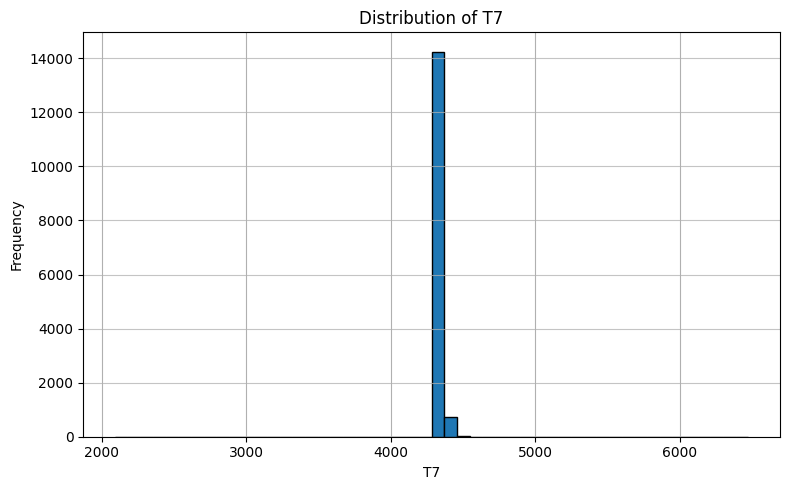

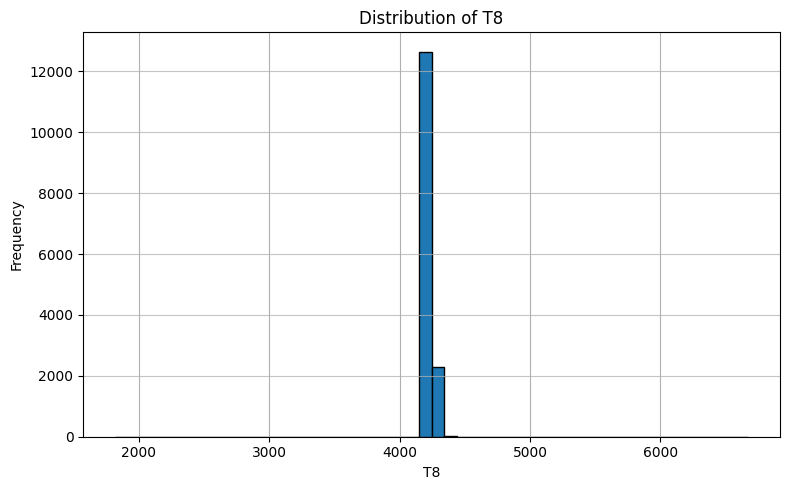

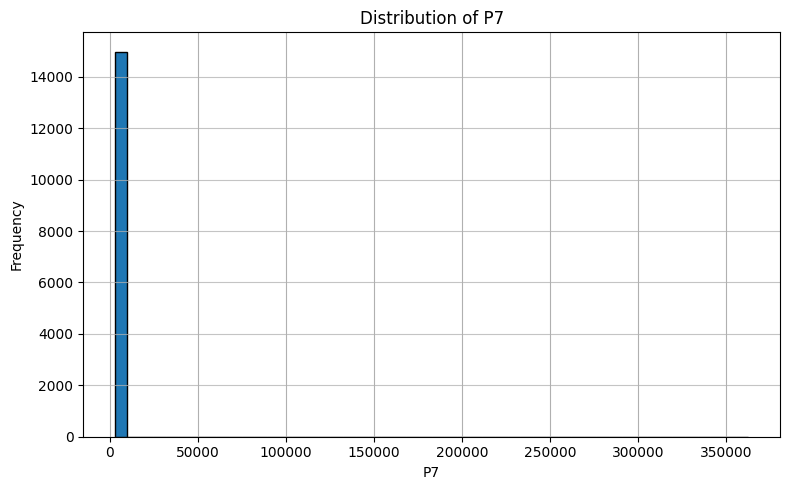

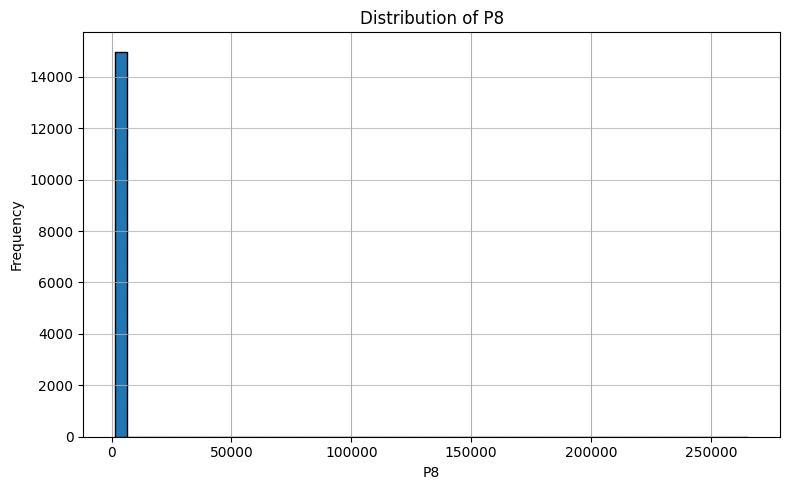

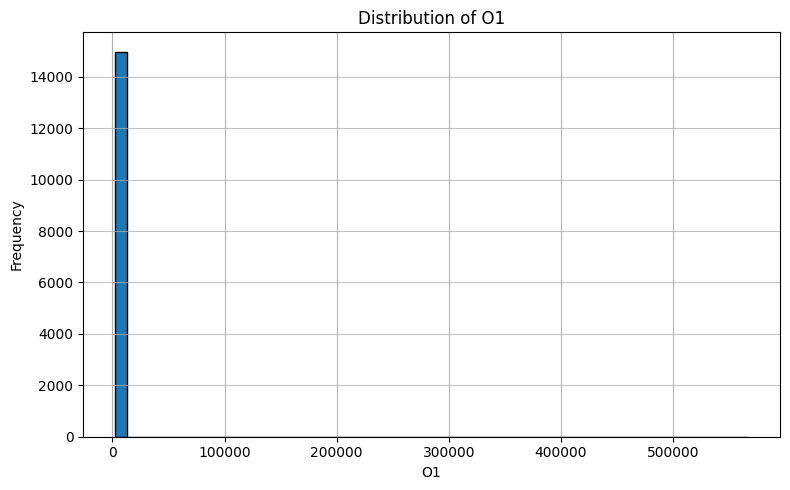

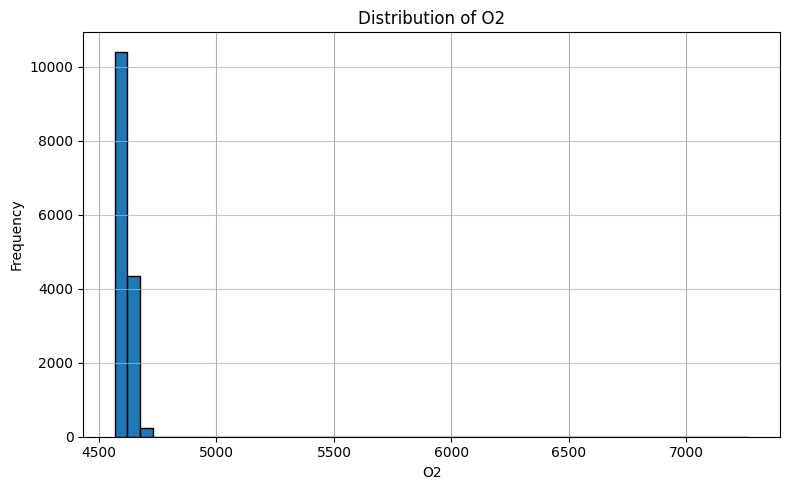

In [11]:
numerical_cols = df.columns.drop('eyeDetection')

for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    df[col].hist(bins=50, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.tight_layout()
    plt.show()

#Summary of Data Analysis
#Key Findings

**Data Completeness**: The dataset contains no missing values, ensuring full data integrity for analysis.

**Feature Distributions**: Most EEG channel features (such as AF3, AF4, and F8) display skewed distributions with long tails, indicating the presence of extreme values.

**Target Balance**: The eyeDetection variable shows a slight class imbalance, with approximately 55% of instances labeled as 'eyes closed' and 45% as 'eyes open'.

**Outliers**: Consistent with the skewed distributions, significant outliers are present across almost all EEG channels, particularly on the upper end of the spectrum.

**Correlations**: While there are moderate positive correlations between EEG channels on the same side of the brain, linear correlations between the features and the target variable are weak (-0.1 to 0.1). This suggests the relationship is likely complex and non-linear.

In [12]:
X = df.drop(columns=['eyeDetection'])
y = df['eyeDetection']
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)
X_train.shape, X_val.shape, X_test.shape

((10486, 14), (2247, 14), (2247, 14))

In [13]:
X_train_np = X_train.values
y_train_np = y_train.values
X_val_np = X_val.values
y_val_np = y_val.values
X_test_np = X_test.values
y_test_np = y_test.values

print('Shape of X_train_np:', X_train_np.shape)
print('Shape of y_train_np:', y_train_np.shape)
print('Shape of X_val_np:', X_val_np.shape)
print('Shape of y_val_np:', y_val_np.shape)
print('Shape of X_test_np:', X_test_np.shape)
print('Shape of y_test_np:', y_test_np.shape)

Shape of X_train_np: (10486, 14)
Shape of y_train_np: (10486,)
Shape of X_val_np: (2247, 14)
Shape of y_val_np: (2247,)
Shape of X_test_np: (2247, 14)
Shape of y_test_np: (2247,)


## Baseline models

In [ ]:
models = {
    'log_reg': Pipeline([
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression(max_iter=1000))
    ]),
    'random_forest': RandomForestClassifier(
        n_estimators=200, random_state=42, n_jobs=-1
    ),
    'gradient_boost': GradientBoostingClassifier(random_state=42),
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_val)
    proba = model.predict_proba(X_val)[:, 1] if hasattr(model, 'predict_proba') else pred
    acc = accuracy_score(y_val, pred)
    auc = roc_auc_score(y_val, proba)
    results.append((name, acc, auc))

results

[('log_reg', 0.6252781486426346, np.float64(0.661249081369452)),
 ('random_forest', 0.9274588340008901, np.float64(0.9807339758009898)),
 ('gradient_boost', 0.812194036493102, np.float64(0.8984683086470553))]

## Hyperparameter tuning

In [ ]:
param_grid = {
    'n_estimators': [200, 400],
    'max_depth': [None, 8, 16],
    'min_samples_split': [2, 5],
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
grid = GridSearchCV(rf, param_grid, scoring='roc_auc', cv=3, n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_params_, grid.best_score_

({'max_depth': None, 'min_samples_split': 2, 'n_estimators': 400},
 np.float64(0.9739394615054112))

## Final evaluation

In [ ]:
best_model = grid.best_estimator_
best_model.fit(pd.concat([X_train, X_val]), pd.concat([y_train, y_val]))
pred = best_model.predict(X_test)
proba = best_model.predict_proba(X_test)[:, 1]
print('Accuracy:', accuracy_score(y_test, pred))
print('ROC AUC:', roc_auc_score(y_test, proba))
print(classification_report(y_test, pred))

Accuracy: 0.9390298175344904
ROC AUC: 0.9844812925170069
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1239
           1       0.95      0.91      0.93      1008

    accuracy                           0.94      2247
   macro avg       0.94      0.94      0.94      2247
weighted avg       0.94      0.94      0.94      2247



## Save model

In [ ]:
import joblib
import os
os.mkdir('model')
joblib.dump(best_model, 'model/model.pkl')
meta = {
    'features': list(X.columns),
    'target': 'eyeDetection',
    'best_params': grid.best_params_,
}
with open('model/metadata.json', 'w') as f:
    json.dump(meta, f, indent=2)


In [ ]:
!pip install scikeras

print("'scikeras' installed successfully.")

'scikeras' installed successfully.


In [ ]:
!pip install keras-tuner

print("'keras-tuner' installed successfully.")

'keras-tuner' installed successfully.


## Define Deep Learning Model Architectures



Defining the architecture and tuning the parameters and training

In [5]:
!pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 4.1 MB/s eta 0:00:00


In [6]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
import keras_tuner as kt
from sklearn.model_selection import train_test_split # Ensure this is imported if not already
import pandas as pd # Ensure pandas is imported if not already

# Reload the DataFrame
df = pd.read_csv('/content/drive/MyDrive/MLZoomcampCapstone2-main/EEG-Eye-State.csv')

# Re-create X, y from df
X = df.drop(columns=['eyeDetection'])
y = df['eyeDetection']

# Re-perform train/val/test split to ensure X_train, y_train etc. are defined
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Ensure X_train_np, y_train_np, etc. are defined by converting from pandas DataFrames/Series
X_train_np = X_train.values
y_train_np = y_train.values
X_val_np = X_val.values
y_val_np = y_val.values
X_test_np = X_test.values
y_test_np = y_test.values

# Define the number of features based on X_train_np shape
input_shape = X_train_np.shape[1]

def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(input_shape,)))

    # Tune the number of units in the first Dense layer
    hp_units_l1 = hp.Int('units_l1', min_value=32, max_value=128, step=32)
    model.add(Dense(units=hp_units_l1, activation='relu'))
    # Tune the dropout rate
    hp_dropout_rate_l1 = hp.Float('dropout_rate_l1', min_value=0.1, max_value=0.5, step=0.1)
    model.add(Dropout(hp_dropout_rate_l1))

    # Tune the number of units in the second Dense layer
    hp_units_l2 = hp.Int('units_l2', min_value=16, max_value=64, step=16)
    model.add(Dense(units=hp_units_l2, activation='relu'))
    # Tune the dropout rate for the second layer
    hp_dropout_rate_l2 = hp.Float('dropout_rate_l2', min_value=0.1, max_value=0.5, step=0.1)
    model.add(Dropout(hp_dropout_rate_l2))

    model.add(Dense(1, activation='sigmoid'))

    # Tune the learning rate for the optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    optimizer = tf.keras.optimizers.Adam(learning_rate=hp_learning_rate)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

print("Keras Tuner 'build_model' function defined successfully.")

Keras Tuner 'build_model' function defined successfully.


In [7]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='keras_tuner_dir',
    project_name='eeg_eye_state_tuning'
)

print("Keras Tuner RandomSearch initialized successfully.")

Keras Tuner RandomSearch initialized successfully.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

print('Starting Keras Tuner hyperparameter search, this may take some time...')
tuner.search(X_train_np, y_train_np, epochs=50, validation_data=(X_val_np, y_val_np), callbacks=[early_stopping])

print('\nKeras Tuner search completed.')

Trial 5 Complete [00h 00m 16s]
val_accuracy: 0.5509568452835083

Best val_accuracy So Far: 0.5509568452835083
Total elapsed time: 00h 01m 47s

Search: Running Trial #6

Value             |Best Value So Far |Hyperparameter
128               |128               |units_l1
0.4               |0.2               |dropout_rate_l1
48                |48                |units_l2
0.2               |0.3               |dropout_rate_l2
0.001             |0.01              |learning_rate

Epoch 1/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5026 - loss: 256.0512 - val_accuracy: 0.5510 - val_loss: 0.6918
Epoch 2/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4983 - loss: 3.0210 - val_accuracy: 0.5510 - val_loss: 0.6891
Epoch 3/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5201 - loss: 1.2907 - val_accuracy: 0.5510 - val_loss: 0.6899
Epoch 4/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5406 - loss: 1.0088 - val_accuracy: 0.5510 - val_loss: 0.6896
Epoch 5/5